In [77]:
import pandas as pd
import numpy as np

# Renaming Columns having spaces to underscores

In [78]:
ufo  = pd.read_csv('http://bit.ly/uforeports')

In [79]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [80]:
ufo.columns = ufo.columns.str.replace(' ','_').str.lower()

In [81]:
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

In [82]:
ufo.add_prefix('ufo_')

,ufo_city,ufo_colors_reported,ufo_shape_reported,ufo_state,ufo_time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [85]:
ufo.add_suffix('_ufo')

,city_ufo,colors_reported_ufo,shape_reported_ufo,state_ufo,time_ufo
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


# Select numeric columns from the DataFrame

In [6]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [7]:
drinks.select_dtypes(include='number').dtypes
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [91]:
drinks.select_dtypes(include=['number', 'object']).dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [93]:
drinks.select_dtypes(exclude='number').dtypes

country      object
continent    object
dtype: object

# Describe based on specific data types

In [8]:
drinks.describe(include=['object', 'float64'])

,country,total_litres_of_pure_alcohol,continent
count,193,193.000000,193
unique,193,NaN,6
top,Afghanistan,NaN,Africa
freq,1,NaN,53
mean,NaN,4.717098,NaN
std,NaN,3.773298,NaN
min,NaN,0.000000,NaN
25%,NaN,1.300000,NaN
50%,NaN,4.200000,NaN
75%,NaN,7.200000,NaN


# Groupby Aggregations

In [9]:
## Single column by different aggregations

drinks.groupby('country')['beer_servings'].agg(['count', 'mean', 'sum', 'min','max'])

,count,mean,sum,min,max
country,,,,,
Afghanistan,1,0.0,0,0,0
Albania,1,89.0,89,89,89
Algeria,1,25.0,25,25,25
Andorra,1,245.0,245,245,245
Angola,1,217.0,217,217,217
...,...,...,...,...,...
Venezuela,1,333.0,333,333,333
Vietnam,1,111.0,111,111,111
Yemen,1,6.0,6,6,6


In [10]:
## Multiple columns by different aggregations

drinks.groupby('country').agg({'beer_servings': 'mean', 'spirit_servings':'max', 'wine_servings':'sum'})

,beer_servings,spirit_servings,wine_servings
country,,,
Afghanistan,0.0,0,0
Albania,89.0,132,54
Algeria,25.0,0,14
Andorra,245.0,138,312
Angola,217.0,57,45
...,...,...,...
Venezuela,333.0,100,3
Vietnam,111.0,2,1
Yemen,6.0,0,0


# Crosstab in Pandas

In [11]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [12]:
pd.crosstab(movies['genre'], movies['content_rating'])

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


# Plots in Pandas

<Axes: ylabel='Frequency'>

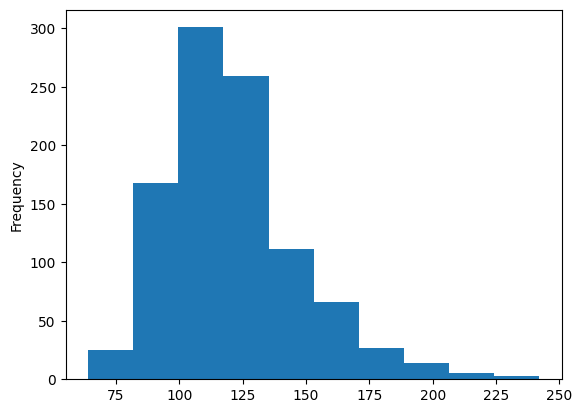

In [13]:
movies['duration'].plot(kind='hist')

<Axes: xlabel='genre'>

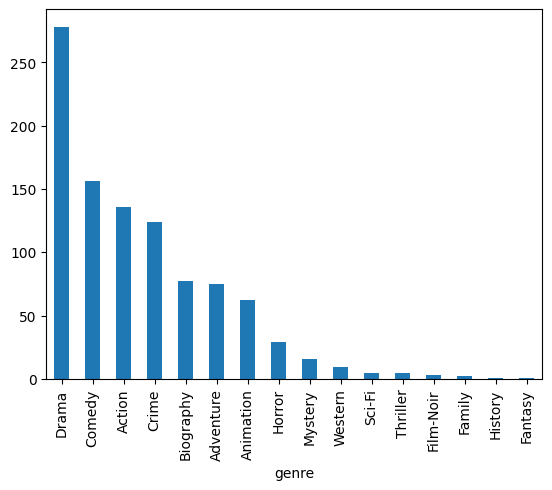

In [14]:
movies['genre'].value_counts().plot(kind='bar')

<Axes: xlabel='continent'>

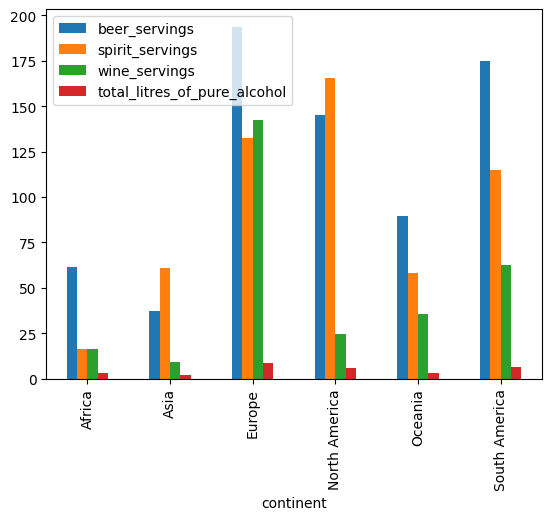

In [15]:
drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].mean().plot(kind='bar')

# Change Display options    

In [16]:
# max Rows

print(pd.get_option('display.max_rows'))

60


In [17]:
pd.set_option('display.max_rows', None)

In [18]:
# max Columns

print(pd.get_option('display.max_columns'))

20


In [19]:
pd.set_option('display.max_columns', None)

In [20]:
# max Columns width

print(pd.get_option('display.max_colwidth'))

50


In [21]:
pd.set_option('display.max_colwidth', None)

In [22]:
# Change Floating values display precision

print(pd.get_option('display.precision'))

6


In [23]:
pd.set_option('display.precision', 2)

In [24]:
# Display Large numbers as (Financial) comma values

pd.set_option('display.float_format', '{:,}'.format)

In [26]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.date_dayfirst : boolean
    When True, prints an

In [27]:
pd.describe_option('rows')

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]
display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: None]
display.min_rows : int
    The numbers of rows to show in a truncated view

In [29]:
## Reset all changes made to Pandas options

pd.reset_option('all')

# Series MultiIndex

In [150]:
stocks = pd.read_csv('http://bit.ly/smallstocks')
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [151]:
## MultiIndex Series
ser_multi = stocks.groupby(['Symbol', 'Date'])['Volume'].mean()
ser_multi

Symbol  Date      
AAPL    2016-10-03   21,701,800.00
        2016-10-04   29,736,800.00
        2016-10-05   21,453,100.00
CSCO    2016-10-03   14,070,500.00
        2016-10-04   18,460,400.00
        2016-10-05   11,808,600.00
MSFT    2016-10-03   19,189,500.00
        2016-10-04   20,085,900.00
        2016-10-05   16,726,400.00
Name: Volume, dtype: float64

In [152]:
# Access Outer Index

ser_multi.loc['AAPL']

Date
2016-10-03   21,701,800.00
2016-10-04   29,736,800.00
2016-10-05   21,453,100.00
Name: Volume, dtype: float64

In [153]:
# Access Inner Index

ser_multi.loc[:,'2016-10-03']

Symbol
AAPL   21,701,800.00
CSCO   14,070,500.00
MSFT   19,189,500.00
Name: Volume, dtype: float64

In [154]:
# Access both Outer and Inner Index

ser_multi.loc['AAPL','2016-10-03']

21701800.0

In [155]:
## Unstack MultiIndex Series and turn into a DataFrame

dte =  ser_multi.unstack()
dte

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,"21,701,800.00","29,736,800.00","21,453,100.00"
CSCO,"14,070,500.00","18,460,400.00","11,808,600.00"
MSFT,"19,189,500.00","20,085,900.00","16,726,400.00"


# MultiIndex DataFrame

In [156]:
stocks.set_index(['Symbol', 'Date'], inplace=True)
stocks.sort_index(inplace=True)
stocks

Close    Volume
Symbol Date                       
AAPL   2016-10-03 112.52  21701800
       2016-10-04 113.00  29736800
       2016-10-05 113.05  21453100
CSCO   2016-10-03  31.50  14070500
       2016-10-04  31.35  18460400
       2016-10-05  31.59  11808600
MSFT   2016-10-03  57.42  19189500
       2016-10-04  57.24  20085900
       2016-10-05  57.64  16726400

In [157]:
stocks.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [158]:
## Access outer Index

stocks.loc['AAPL']

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [159]:
## Access inner Index

stocks.loc[(slice(None),'2016-10-03'), :]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-03,112.52,21701800
CSCO,2016-10-03,31.50,14070500
MSFT,2016-10-03,57.42,19189500


In [160]:
## Access both Outer and Inner Index

stocks.loc[('AAPL', '2016-10-03'), :]

Close           112.52
Volume   21,701,800.00
Name: (AAPL, 2016-10-03), dtype: float64

In [161]:
## Access both Outer and Inner Multiple Index

stocks.loc[(['AAPL', 'MSFT'], ['2016-10-03', '2016-10-05']), :]

Close    Volume
Symbol Date                       
AAPL   2016-10-03 112.52  21701800
       2016-10-05 113.05  21453100
MSFT   2016-10-03  57.42  19189500
       2016-10-05  57.64  16726400

# Show Pandas Version and version of its dependencies

In [74]:
pd.__version__

'2.0.3'

In [73]:
pd.show_versions()

c:\Users\PC\anaconda3\envs\ua\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.9.18.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22631
machine          : AMD64
processor        : Intel64 Family 6 Model 154 Stepping 3, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 2.0.3
numpy            : 1.26.3
pytz             : 2023.3.post1
dateutil         : 2.8.2
setuptools       : 68.2.2
pip              : 23.3.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.3
IPython          : 8.15.0
pandas_datareader: None
bs4              : 4.12.2
bottleneck       : None


# Create a toy DataFrame quickly

In [76]:
pd.DataFrame(np.random.randn(15, 8), columns=list('ABCDEFGH'))

,A,B,C,D,E,F,G,H
0,0.633204,0.798040,-0.084820,-1.258430,-0.205283,-0.155741,0.148427,-0.126305
1,-0.933567,-0.694469,0.674598,-0.670601,-1.376690,0.906301,-0.888021,1.535174
2,-0.325330,-1.449752,-1.129080,0.956067,0.572503,1.007149,0.582098,-2.353306
3,-1.077072,0.995927,-0.686939,-0.577693,0.698411,0.455582,-1.148373,-0.065195
4,0.862149,1.045712,0.576570,1.090994,1.444050,-0.917561,-0.506939,1.034821
5,0.764131,-0.679107,0.842067,-0.080109,0.209381,0.105533,-0.622126,0.249821
6,-0.168753,-0.527660,0.375556,1.298063,-0.356255,0.759921,-0.485519,1.910368
7,-0.391459,0.590537,1.623832,-0.756983,-0.659931,1.524527,-0.477526,0.785184
8,0.544871,-0.226982,0.699726,-0.786654,0.016131,1.431383,1.832194,-0.584502
9,0.135711,-3.424791,-1.435635,-0.232679,-0.276784,-1.284709,-1.762290,-0.987480


# Create dataFrame from data copied from clipboard

In [95]:
pd.read_clipboard()  # make sure you have copied from excel etc

,Stock,Value,Close
0,ALI,11834,38146
1,HUW,26422,24303
2,NOK,29583,41290


# Reverse Row Order

In [86]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [87]:
drinks.loc[::-1].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
192,Zimbabwe,64,18,4,4.7,Africa
191,Zambia,32,19,4,2.5,Africa
190,Yemen,6,0,0,0.1,Asia
189,Vietnam,111,2,1,2.0,Asia
188,Venezuela,333,100,3,7.7,South America


# Reverse Column Order

In [89]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [90]:
drinks.loc[:, ::-1].head()

,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings,country
0,Asia,0.0,0,0,0,Afghanistan
1,Europe,4.9,54,132,89,Albania
2,Africa,0.7,14,0,25,Algeria
3,Europe,12.4,312,138,245,Andorra
4,Africa,5.9,45,57,217,Angola


# Select Largest Values in a DataFrame

In [101]:
counts = movies['genre'].value_counts()
counts.head()

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: count, dtype: int64

In [100]:
movies[movies['genre'].isin(counts.nlargest(3).index)].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


# Drop Columns which have atleast 10% of missing values

In [107]:
ufo.isna().sum()/len(ufo)

city               0.001425
colors_reported    0.842004
shape_reported     0.144948
state              0.000000
time               0.000000
dtype: float64

In [103]:
ufo.dropna(thresh=len(ufo)*0.9, axis=1).head()   # (thresh=len(ufo)*0.9 ) keep columns where 90% of values are not missing

,city,state,time
0,Ithaca,NY,6/1/1930 22:00
1,Willingboro,NJ,6/30/1930 20:00
2,Holyoke,CO,2/15/1931 14:00
3,Abilene,KS,6/1/1931 13:00
4,New York Worlds Fair,NY,4/18/1933 19:00


# Create bins of a numerical column

In [113]:
titanic = pd.read_csv('http://bit.ly/kaggletrain') 

In [116]:
pd.cut(titanic['Age'], bins=[0,18,25,99], labels=['child', 'teenager', 'adult']).head(10)

0    teenager
1       adult
2       adult
3       adult
4       adult
5         NaN
6       adult
7       child
8       adult
9       child
Name: Age, dtype: category
Categories (3, object): ['child' < 'teenager' < 'adult']

# Display floating points to a precision of 2

In [117]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [119]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Format style of DatFrame display

In [162]:
stocks.reset_index(inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Symbol,Date,Close,Volume
0,AAPL,2016-10-03,112.52,21701800
1,AAPL,2016-10-04,113.00,29736800
2,AAPL,2016-10-05,113.05,21453100
3,CSCO,2016-10-03,31.50,14070500
4,CSCO,2016-10-04,31.35,18460400


In [164]:
format_dict = {'Date':'{:%y-%m-%d}', 
               'Close':'${:.2f}', 
               'Volume':'{:,}'}

In [165]:
stocks.style.format(format_dict)

,Symbol,Date,Close,Volume
0,AAPL,16-10-03,$112.52,"21,701,800"
1,AAPL,16-10-04,$113.00,"29,736,800"
2,AAPL,16-10-05,$113.05,"21,453,100"
3,CSCO,16-10-03,$31.50,"14,070,500"
4,CSCO,16-10-04,$31.35,"18,460,400"
5,CSCO,16-10-05,$31.59,"11,808,600"
6,MSFT,16-10-03,$57.42,"19,189,500"
7,MSFT,16-10-04,$57.24,"20,085,900"
8,MSFT,16-10-05,$57.64,"16,726,400"


In [166]:
(stocks.style.format(format_dict)
 .hide(axis='index')
 .highlight_min('Close', color='red')
 .highlight_max('Close', color='lightgreen')
)

Symbol,Date,Close,Volume
AAPL,16-10-03,$112.52,"21,701,800"
AAPL,16-10-04,$113.00,"29,736,800"
AAPL,16-10-05,$113.05,"21,453,100"
CSCO,16-10-03,$31.50,"14,070,500"
CSCO,16-10-04,$31.35,"18,460,400"
CSCO,16-10-05,$31.59,"11,808,600"
MSFT,16-10-03,$57.42,"19,189,500"
MSFT,16-10-04,$57.24,"20,085,900"
MSFT,16-10-05,$57.64,"16,726,400"


In [171]:
(stocks.style.format(format_dict)
 .hide(axis='index')
 .background_gradient(subset='Volume', cmap='Blues')
)

Symbol,Date,Close,Volume
AAPL,16-10-03,$112.52,"21,701,800"
AAPL,16-10-04,$113.00,"29,736,800"
AAPL,16-10-05,$113.05,"21,453,100"
CSCO,16-10-03,$31.50,"14,070,500"
CSCO,16-10-04,$31.35,"18,460,400"
CSCO,16-10-05,$31.59,"11,808,600"
MSFT,16-10-03,$57.42,"19,189,500"
MSFT,16-10-04,$57.24,"20,085,900"
MSFT,16-10-05,$57.64,"16,726,400"


In [175]:
(stocks.style.format(format_dict)
 .hide(axis='index')
 .bar(subset='Volume', color='lightgreen', align='zero')
 .set_caption('Stock Prices from October 2016')
)

Symbol,Date,Close,Volume
AAPL,16-10-03,$112.52,"21,701,800"
AAPL,16-10-04,$113.00,"29,736,800"
AAPL,16-10-05,$113.05,"21,453,100"
CSCO,16-10-03,$31.50,"14,070,500"
CSCO,16-10-04,$31.35,"18,460,400"
CSCO,16-10-05,$31.59,"11,808,600"
MSFT,16-10-03,$57.42,"19,189,500"
MSFT,16-10-04,$57.24,"20,085,900"
MSFT,16-10-05,$57.64,"16,726,400"


# Count the number of words in a string column

In [180]:
(ufo['colors_reported'].str.count(' ') +1).value_counts()

colors_reported
1.00    2458
2.00     352
3.00      67
4.00       5
Name: count, dtype: int64

# Resample (Groupby for date)

In [182]:
stocks.resample('D', on='Date')['Close'].mean()  # If date column was in index, then no need for on Parameter

Date
2016-10-03   67.15
2016-10-04   67.20
2016-10-05   67.43
Freq: D, Name: Close, dtype: float64